In [ ]:
import torch
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

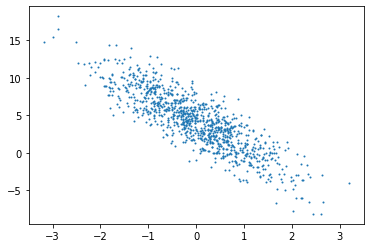

In [ ]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                       dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                       dtype=torch.float32)

fig,ax=plt.subplots()
ax.scatter(features[:, 1].numpy(), labels.numpy(),1,color='C0')

在训练模型的时候，我们需要遍历数据集并不断读取小批量数据样本。这里我们定义一个函数：它每次返回`、batch_siz`e（批量大小）个随机样本的特征和标签。

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.2202,  0.4191],
        [-0.3084, -0.2021],
        [-0.2940,  0.0934],
        [-0.5010, -1.4321],
        [ 1.1784,  0.7101],
        [-0.0792, -0.1524],
        [ 0.4404,  0.1404],
        [-0.3477,  0.3592],
        [-0.2666, -0.1778],
        [ 0.9775, -1.3280]]) tensor([ 2.3229,  4.2585,  3.3016,  8.0620,  4.1377,  4.5564,  4.6138,  2.2791,
         4.2710, 10.6790])


In [ ]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

In [ ]:
def linreg(X, w, b):  
    return torch.mm(X, w) + b

def squared_loss(y_hat, y):  
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

def sgd(params, lr, batch_size):  
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.037601
epoch 2, loss 0.000136
epoch 3, loss 0.000049
